***DATA ANALYSIS***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os #file I/O
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import os

%matplotlib inline

import matplotlib.pyplot as plt #used for plotting and analyzing data

#used for image display
import PIL 
from PIL import Image

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import PIL 
from PIL import Image

In [2]:
import os
print(os.listdir("../input"))

['isic-2019', 'testttt', 'skin-cancer9-classesisic']


In [3]:
path='../input/'

In [4]:
lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis ',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
    'SCC' : 'Squamous cell carcinoma'
} 

***THE PREPROCESSING OF SKIN IMAGES***

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import textwrap as tw
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.applications.resnet import preprocess_input
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import layers


Using TensorFlow backend.


In [6]:
# # print all columns
# pd.set_option('display.max_columns', None)

# # inhibit graphics card runs out of memory
# gpu_devices = tf.config.experimental.list_physical_devices('GPU')
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)


In [7]:
def load_data(path: str):
    dir = Path(path)
    # list of all filepathes
    filepaths = list(dir.glob(r'**/*.jpg'))
    # list of labels extracted from last foldername of filepath
    labels = list(map(lambda l: os.path.split(os.path.split(l)[0])[1], filepaths))
    # series of string filepathes
    filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
    # series of string labels
    labels = pd.Series(labels, name='Labels').astype(str)
    # merge series to dataframe df
    df = pd.merge(filepaths, labels, right_index=True, left_index=True)
    # Resampling complete rows and reset the index
    return df.sample(frac=1).reset_index(drop=True)
df = load_data('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [8]:
# total categires 
len(os.listdir('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train'))

9

In [9]:
os.listdir('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

['pigmented benign keratosis',
 'melanoma',
 'vascular lesion',
 'actinic keratosis',
 'squamous cell carcinoma',
 'basal cell carcinoma',
 'seborrheic keratosis',
 'dermatofibroma',
 'nevus']

In [10]:
list_diseases = os.listdir('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [11]:
results2 = []
for disease in list_diseases:
    dies_name_count = {}
    count_disease = len(os.listdir(f'../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train'))
    dies_name_count['disease'] = disease
    dies_name_count['count_images'] = count_disease
    results2.append(dies_name_count)

In [12]:
results = pd.DataFrame(results2)
results

,disease,count_images
0,pigmented benign keratosis,9
1,melanoma,9
2,vascular lesion,9
3,actinic keratosis,9
4,squamous cell carcinoma,9
5,basal cell carcinoma,9
6,seborrheic keratosis,9
7,dermatofibroma,9
8,nevus,9


In [13]:
df.head(25)

,FilePaths,Labels
0,../input/skin-cancer9-classesisic/Skin cancer ...,squamous cell carcinoma
1,../input/skin-cancer9-classesisic/Skin cancer ...,pigmented benign keratosis
2,../input/skin-cancer9-classesisic/Skin cancer ...,actinic keratosis
3,../input/skin-cancer9-classesisic/Skin cancer ...,actinic keratosis
4,../input/skin-cancer9-classesisic/Skin cancer ...,nevus
5,../input/skin-cancer9-classesisic/Skin cancer ...,nevus
6,../input/skin-cancer9-classesisic/Skin cancer ...,melanoma
7,../input/skin-cancer9-classesisic/Skin cancer ...,basal cell carcinoma
8,../input/skin-cancer9-classesisic/Skin cancer ...,basal cell carcinoma
9,../input/skin-cancer9-classesisic/Skin cancer ...,pigmented benign keratosis


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FilePaths  2239 non-null   object
 1   Labels     2239 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


[Text(0, 0, 'seborrheic keratosis'),
 Text(0, 0, 'dermatofibroma'),
 Text(0, 0, 'actinic keratosis'),
 Text(0, 0, 'vascular lesion'),
 Text(0, 0, 'squamous cell carcinoma'),
 Text(0, 0, 'nevus'),
 Text(0, 0, 'basal cell carcinoma'),
 Text(0, 0, 'melanoma'),
 Text(0, 0, 'pigmented benign keratosis')]

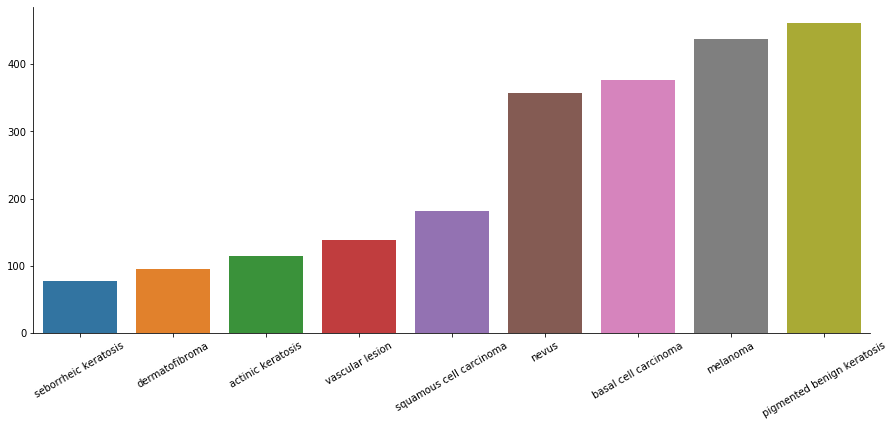

In [15]:
# ordered count of rows per unique label
labels_count = df['Labels'].value_counts(ascending=True)

f = plt.figure(figsize=(15, 6))
s = sns.barplot(labels_count.index,labels_count.values)
sns.despine()
s.set_xticklabels(s.get_xticklabels(), rotation = 30)

In [16]:
# def plot_images_per_label(df, label, cols: int, size: tuple):
#     fig, axs = plt.subplots(nrows=1, ncols=cols, figsize=size)

#     cntMax = cols
#     cntCur = 0
#     for index, row in df.iterrows():
#         if(row['Labels'] == label and cntCur < cntMax):
#             axs[cntCur].imshow(plt.imread(df.FilePaths[index]))
#             axs[cntCur].set_title(df.Labels[index])

#             cntCur += 1
#         else:
#             if(cntCur >= cntMax):
#                 break
    
#     plt.tight_layout()
#     plt.show()


# # unique labels
# labels = sorted(df['Labels'].unique())
# # loop through labels
# for label in labels:
#     plot_images_per_label(df, label, 3, (12,9))

In [17]:
# stratified train and val (20%) datasets
X_train, X_val = train_test_split(df, test_size=0.2, stratify=df['Labels'], random_state=1)

print('Train Data: ', X_train.shape)
print('Val Data: ', X_val.shape)

Train Data:  (1791, 2)
Val Data:  (448, 2)


In [18]:
# number of samples/images per iteration
BATCH_SIZE = 32
# input image size
IMG_SIZE = (224, 224)
# count of epchos
EPOCHS = 2

# image preprocessing
img_data_gen = ImageDataGenerator(shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  preprocessing_function=preprocess_input)


img_data_gen_test = ImageDataGenerator()



X_train = img_data_gen.flow_from_dataframe(dataframe=X_train,
                                           x_col='FilePaths',
                                           y_col='Labels',
                                           target_size=IMG_SIZE,
                                           color_mode='rgb',
                                           class_mode='categorical',
                                           batch_size=BATCH_SIZE,
                                           seed=1)


X_val = img_data_gen_test.flow_from_dataframe(dataframe=X_val,
                                         x_col='FilePaths',
                                         y_col='Labels',
                                         target_size=IMG_SIZE,
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         seed=1)

Found 1791 validated image filenames belonging to 9 classes.
Found 448 validated image filenames belonging to 9 classes.


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


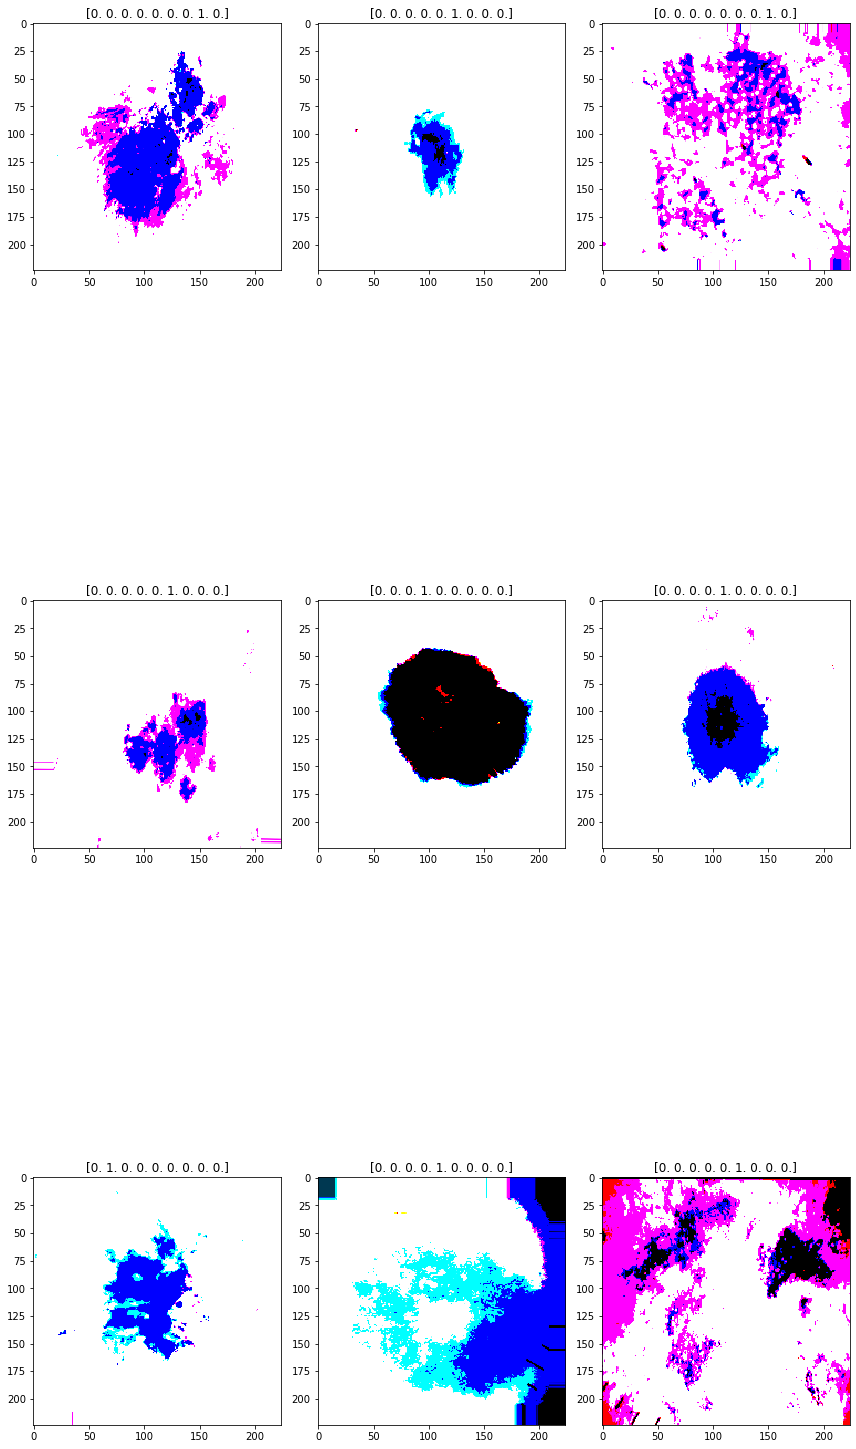

In [19]:
fit, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,27))

for i, a in enumerate(ax.flat):
    img, label = X_train.next()
    a.imshow(img[0],)
    a.set_title(label[0])

plt.tight_layout()
plt.show()

In [20]:
#model sequelling
model = Sequential()

model.add(layers.Conv2D(32, (3,3), input_shape = (224,224,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [22]:
#compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [23]:
# stop training when accuracy has stopped improving 
# cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
# hst = model.fit(X_train, validation_data=X_val, epochs=EPOCHS, callbacks=cb)
# train model 
hst = model.fit(X_train, validation_data=X_val, epochs=EPOCHS)

Train for 56 steps, validate for 14 steps
Epoch 1/2
56/56 [==============================] - 140s 3s/step - loss: 3.6701 - acc: 0.8533 - val_loss: 0.4432 - val_acc: 0.8889
Epoch 2/2
56/56 [==============================] - 115s 2s/step - loss: 0.3586 - acc: 0.8889 - val_loss: 0.4034 - val_acc: 0.8889


In [24]:
# model.save_weights('model',save_format='tf')

In [25]:
# model.load_weights('model')

<Figure size 432x288 with 0 Axes>

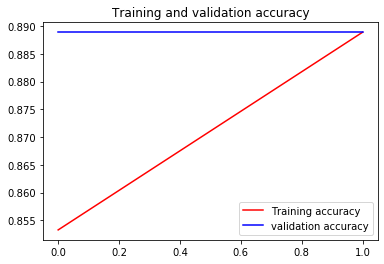

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt
acc = hst.history['acc']
val_acc = hst.history['val_acc']
loss = hst.history['loss']
val_loss = hst.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc= 0)
plt.figure()


In [27]:
X_test = load_data('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [28]:
X_test.head(25)

,FilePaths,Labels
0,../input/skin-cancer9-classesisic/Skin cancer ...,squamous cell carcinoma
1,../input/skin-cancer9-classesisic/Skin cancer ...,pigmented benign keratosis
2,../input/skin-cancer9-classesisic/Skin cancer ...,pigmented benign keratosis
3,../input/skin-cancer9-classesisic/Skin cancer ...,actinic keratosis
4,../input/skin-cancer9-classesisic/Skin cancer ...,melanoma
5,../input/skin-cancer9-classesisic/Skin cancer ...,actinic keratosis
6,../input/skin-cancer9-classesisic/Skin cancer ...,nevus
7,../input/skin-cancer9-classesisic/Skin cancer ...,vascular lesion
8,../input/skin-cancer9-classesisic/Skin cancer ...,pigmented benign keratosis
9,../input/skin-cancer9-classesisic/Skin cancer ...,basal cell carcinoma


In [29]:
print('Test Data: ', X_test.shape)

# ordered count of rows per unique label
X_test['Labels'].value_counts(ascending=True)

Test Data:  (118, 2)


vascular lesion                3
seborrheic keratosis           3
nevus                         16
dermatofibroma                16
melanoma                      16
actinic keratosis             16
squamous cell carcinoma       16
basal cell carcinoma          16
pigmented benign keratosis    16
Name: Labels, dtype: int64

In [30]:
# image preprocessing
X_test = img_data_gen.flow_from_dataframe(dataframe=X_test,
                                          x_col='FilePaths',
                                          y_col='Labels',
                                          target_size=IMG_SIZE,
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          shuffle=False, # necessary fpr confusion matrix
                                          seed=1)

Found 118 validated image filenames belonging to 9 classes.


In [39]:
import PIL.Image as Image

In [40]:
image_path = '/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024331.jpg'

In [41]:
IMAGE_SHAPE = (224, 224)

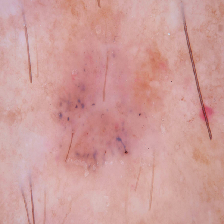

In [42]:
image = Image.open(image_path).resize(IMAGE_SHAPE)
image

In [43]:
image = np.array(image)/255.0
image.shape

(224, 224, 3)

In [44]:
result = model.predict(image[np.newaxis, ...])
result


# array([[0.0000000e+00, 2.8053434e-35, 0.0000000e+00, 3.6857502e-37,
#         0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.4883269e-26,
#         0.0000000e+00]], dtype=float32)

array([[0.47285753]], dtype=float32)

In [45]:
# predicted_label_index = np.argmax(result)
# predicted_label_index
np.argmax(result)

0

In [46]:
# image

In [ ]:
res = model.evaluate(X_test)

In [ ]:
# accuracy
print(f'Train Accuracy: {hst.history["acc"][-1:][0] * 100:.2f}')
print(f'Val Accuracy: {hst.history["val_acc"][-1:][0] * 100:.2f}')
print(f'Test Accuracy: {res[1] * 100:.2f}')
# loss
print(f'Train Loss: {hst.history["loss"][-1:][0] * 100:.2f}')
print(f'Val Loss: {hst.history["val_loss"][-1:][0] * 100:.2f}')
print(f'Test Loss: {res[0] * 100:.2f}')

In [ ]:
# predicted labels
Y_pred = model.predict(X_test)
print("Y_pred", Y_pred.shape)
# rounded labels
y_pred = np.argmax(Y_pred, axis=1)
print("y_pred", y_pred.size)

In [ ]:
# true labels
y_true = X_test.classes
print("y_pred", len(y_pred))
# label classes
class_labels = list(X_test.class_indices.keys())
print("labels", len(class_labels))

In [ ]:
# compare with true labels
cfm = confusion_matrix(y_pred, y_true, normalize='true')

# plot size
fig, ax = plt.subplots(figsize=(15,15))
# print confusion matrix
s = sns.heatmap(cfm,
               annot=True,
               cmap=['#ff0001', '#09AA11'],
               center=0.8,
               fmt='.1%',
               linewidths=.5,
               cbar_kws={'format': FuncFormatter(lambda x, pos: '{:.0%}'.format(x))}, #'label': 'Percentage' 
               linecolor='Black',
               ax=ax)
# set labels
s.set(xlabel='Predict', ylabel='True')
s.set(title='Confusion Matrix')
s.set_yticklabels([tw.fill(e, 10) for e in class_labels])
s.set_xticklabels([tw.fill(e, 10) for e in class_labels])

***SEGMENTATION***


In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from pathlib import Path
import os
import pandas as pd

In [ ]:
def load_data(path: str):
    dir = Path(path)
    # list of all filepathes
    filepaths = list(dir.glob(r'**/*.jpg'))
    # list of labels extracted from last foldername of filepath
    labels = list(map(lambda l: os.path.split(os.path.split(l)[0])[1], filepaths))
    # series of string filepathes
    filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
    # series of string labels
    labels = pd.Series(labels, name='Labels').astype(str)
    # merge series to dataframe df
    df = pd.merge(filepaths, labels, right_index=True, left_index=True)
    # Resampling complete rows and reset the index
    return df.sample(frac=1).reset_index(drop=True)
df = load_data('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
image = plt.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024331.jpg')
image.shape
plt.imshow(image)

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
image = plt.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024331.jpg')
plt.imshow(image)

In [ ]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

In [ ]:
plt.imshow(out_h, cmap='gray')

In [ ]:
plt.imshow(out_v, cmap='gray')

In [ ]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [ ]:
pic = plt.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024331.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [ ]:
from  numpy import *
import cv2
import numpy
from scipy.cluster.vq import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import data
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)
 
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

In [ ]:
image = cv2.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg',0)
plt.imshow(image, cmap='gray')

In [ ]:
#image = img_as_float(data.camera())
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=50,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

In [ ]:
img_cv = cv[1]
plt.imshow(img_cv, cmap='gray')

In [ ]:
elevation_map = sobel(img_cv)
markers = np.zeros_like(img_cv)
markers[image < 30] = 1
markers[image > 150] = 2
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]

In [ ]:
edges = sobel(img_cv)
im_test1 = watershed(edges, markers=468, compactness=0.001)

In [ ]:
edges = canny(img_cv)
fill_coins = ndi.binary_fill_holes(edges)
im_test2 = ndi.label(remove_small_objects(fill_coins, 21))[0]

In [ ]:
image = img_as_float(img_cv)
gradient = inverse_gaussian_gradient(image)
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
im_test3 = morphological_geodesic_active_contour(gradient, iterations=500,
                                                 init_level_set=init_ls,
                                                 smoothing=1, balloon=-1,
                                                 threshold=0.69)
im_test3 = label(im_test3)

method_names = ['Compact watershed', 'Canny filter',
                'Morphological Geodesic Active Contours']
short_method_names = ['Compact WS', 'Canny', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []
for name, im_test in zip(method_names, [im_test1, im_test2, im_test3]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error}")
    print(f"Adapted Rand precision: {precision}")
    print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

ax[0].scatter(merge_list, split_list)
for i, txt in enumerate(short_method_names):
    ax[0].annotate(txt, (merge_list[i], split_list[i]),
                   verticalalignment='center')
ax[0].set_xlabel('False Merges (bits)')
ax[0].set_ylabel('False Splits (bits)')
ax[0].set_title('Split Variation of Information')

ax[1].scatter(precision_list, recall_list)
for i, txt in enumerate(short_method_names):
    ax[1].annotate(txt, (precision_list[i], recall_list[i]),
                   verticalalignment='center')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Adapted Rand precision vs. recall')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

ax[2].imshow(mark_boundaries(image, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(mark_boundaries(image, im_test1))
ax[3].set_title('Compact Watershed')
ax[3].set_axis_off()

ax[4].imshow(mark_boundaries(image, im_test2))
ax[4].set_title('Edge Detection')
ax[4].set_axis_off()

ax[5].imshow(mark_boundaries(image, im_test3))
ax[5].set_title('Morphological GAC')
ax[5].set_axis_off()

plt.show()

***FEATURE EXTRACTION AND SVM***

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [ ]:
data = pd.read_csv("../input/isic-2019/ISIC_2019_Training_GroundTruth.csv", header = 0)

In [ ]:
print(data.head(25))
print(data.tail(25))

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
features_skinlesion = list(data.columns[1:9])
print(features_skinlesion)
print("=------------")

In [ ]:
data.describe()

In [ ]:
corr = data[features_skinlesion].corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt='.2f', annot_kws = {'size': 15}, xticklabels = features_skinlesion, yticklabels = features_skinlesion, cmap= 'coolwarm')

In [ ]:
train,test = train_test_split(data, test_size = 100)
print(train.shape)
print(test.shape)

In [ ]:
prediction_var = ['MEL', 'NV', 'BCC', 'AK', 'BKL','DF','VASC','SCC']

In [ ]:
train_X = train[prediction_var]
train_Y = train.MEL
test_X = test[prediction_var]
test_Y = test.MEL
model = svm.SVC()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(prediction)


train_X1 = train[prediction_var]
train_Y1 = train.NV
test_X1= test[prediction_var]
test_Y1 = test.NV
model = svm.SVC()
model.fit(train_X1, train_Y1)
prediction = model.predict(test_X1)
print(prediction)


train_X2 = train[prediction_var]
train_Y2 = train.BCC
test_X2 = test[prediction_var]
test_Y2 = test.BCC
model = svm.SVC()
model.fit(train_X2, train_Y2)
prediction = model.predict(test_X2)
print(prediction)


train_X3 = train[prediction_var]
train_Y3 = train.AK
test_X3 = test[prediction_var]
test_Y3 = test.AK
model = svm.SVC()
model.fit(train_X3, train_Y3)
prediction = model.predict(test_X3)
print(prediction)


train_X4 = train[prediction_var]
train_Y4 = train.BKL
test_X4 = test[prediction_var]
test_Y4 = test.BKL
model = svm.SVC()
model.fit(train_X4, train_Y4)
prediction = model.predict(test_X4)
print(prediction)


train_X5 = train[prediction_var]
train_Y5 = train.DF
test_X5 = test[prediction_var]
test_Y5 = test.DF
model = svm.SVC()
model.fit(train_X5, train_Y5)
prediction = model.predict(test_X5)
print(prediction)


train_X7= train[prediction_var]
train_Y7 = train.VASC
test_X7 = test[prediction_var]
test_Y7 = test.VASC
model = svm.SVC()
model.fit(train_X7, train_Y7)
prediction = model.predict(test_X7)
print(prediction)

train_X8= train[prediction_var]
train_Y8 = train.SCC
test_X8 = test[prediction_var]
test_Y9 = test.SCC
model = svm.SVC()
model.fit(train_X8, train_Y8)
prediction = model.predict(test_X8)
print(prediction)

In [ ]:
metrics.accuracy_score(prediction, test_Y)